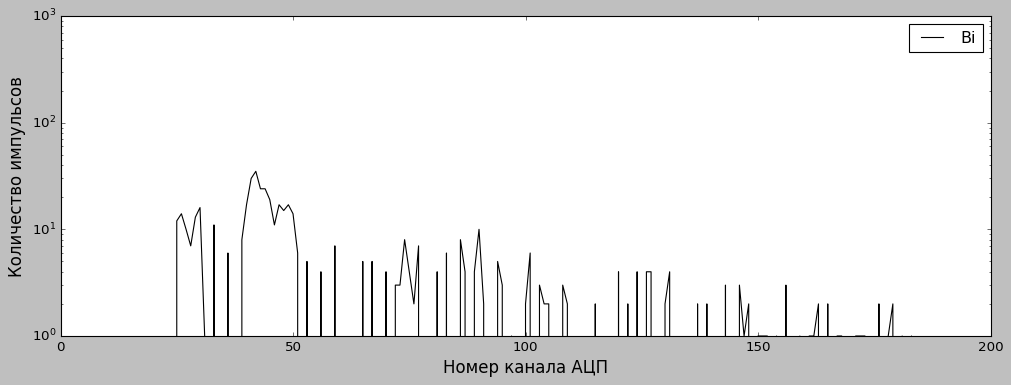

In [29]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

fig, ax = plt.subplots()
ax.set_xlim(left = 0, right = 200)
ax.set_ylim(top = 1000, bottom = 1)
ax.set_yscale('log')
ax.set_ylabel('Количество импульсов', fontsize=15)
ax.set_xlabel('Номер канала АЦП', fontsize=15)
threshold = 20
df = pd.DataFrame()
dfi = pd.DataFrame()
df['Channel'] = pd.Series(np.arange(0, 4096))
dfi['Channel'] = pd.Series(np.arange(0, 4096))
voltages = ("Spektr600", "Spektr650", "Spektr700", "Spektr750", "Spektr800", "Spektr850", 
             "Spektr900", "Spektr950", "MSpektr950", "MSpektr1000", "MSpektr1050")
spectrs = ("SpektrBi1", "SpektrBi10", "SpektrNoise10", "SpektrStr310", "SpektrStr610", "Noise90", "Str90", "Bi90", "Ra90")
for name in voltages:
    f = open("./ADC/Разумов спектры черенок/"+name+".txt", "r")
    splist = []
    for i in f.readlines():
        splist.append(int(i.strip().split()[1]))
        #if splist[-1] < threshold: splist[-1]=0
    f.close()
    df[name] = pd.Series(splist)
    
for name in spectrs:
    f = open("./ADC/Разумов спектры черенок/"+name+".txt", "r")
    splist = []
    for i in f.readlines():
        splist.append(int(i.strip().split()[1]))
    f.close()
    dfi[name] = pd.Series(splist)
    
#plt.plot(df['Channel'], df['Spektr700'], df['Spektr750'], df['MSpektr950'])
#plt.plot(dfi['Channel'], dfi['Noise90'], dfi['Str90'])

#ax.legend()
dfi['Dif'] = dfi['Bi90'] - dfi['Noise90']
#dfi['Dif'][20:50]
plt.plot(dfi['Channel'], dfi['Dif'], label='Bi', color='black')
ax.legend(loc='upper right')
#df[['Spektr700', 'Spektr750', 'MSpektr950']]
plt.savefig("Текст/pictures/Bi90.pdf")

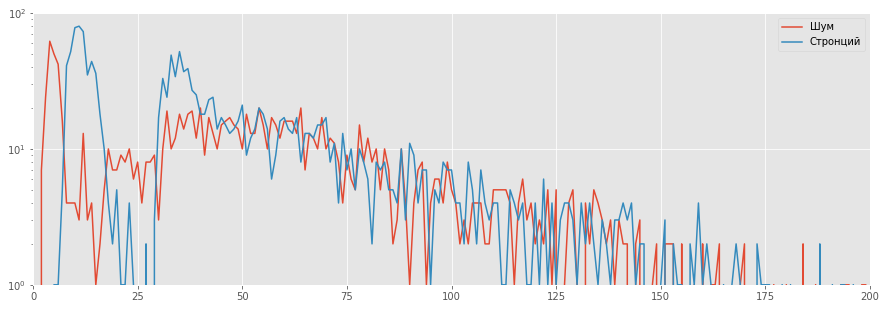

In [2]:
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

fig, ax = plt.subplots()
ax.set_xlim(left = 0, right = 200)
ax.set_ylim(top = 100, bottom = 1)
ax.set_yscale('log')
plt.plot(dfi['Channel'], dfi['Noise90'], dfi['Str90'])
ax.legend(loc='upper right')
ax.legend(labels=['Шум', 'Стронций'])

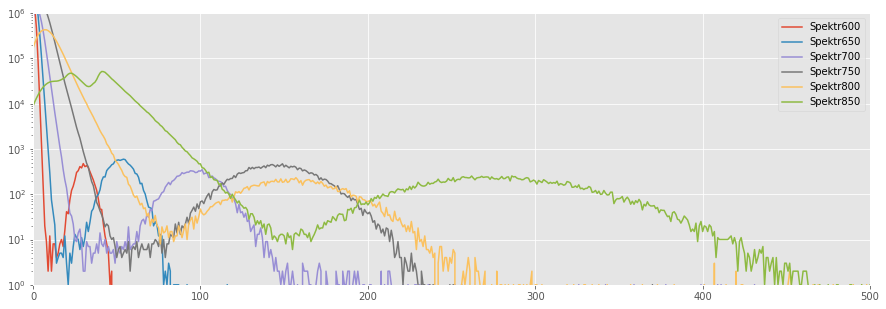

In [2]:
fig, ax = plt.subplots()
ax.set_xlim(left = 0, right = 200)
ax.set_ylim(top = 1000000, bottom = 1)
ax.set_yscale('log')
df[['Spektr600','Spektr650', 'Spektr700', 'Spektr750', 'Spektr800', 'Spektr850']].plot(kind='line', ax = ax, xlim = (0, 500))

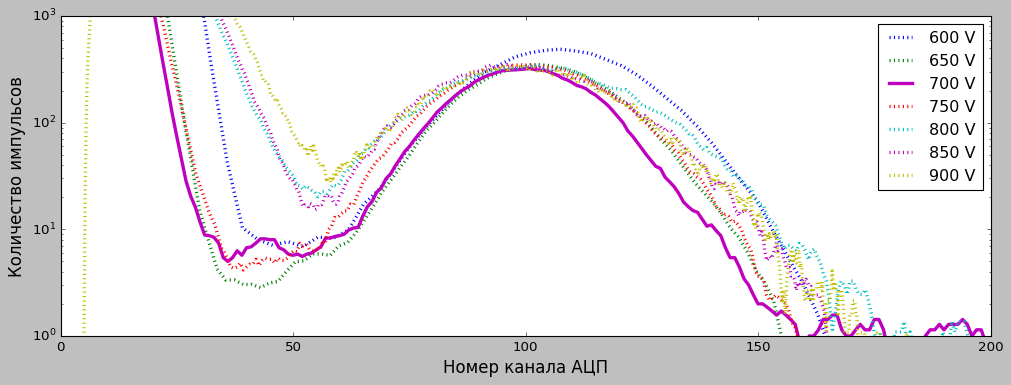

In [24]:
fig, ax = plt.subplots()
ax.set_xlim(left = 0, right = 200)
ax.set_ylim(top = 1000, bottom = 1)
ax.set_yscale('log')
ax.set_ylabel('Количество импульсов', fontsize=15)
ax.set_xlabel('Номер канала АЦП', fontsize=15)
plt.rcParams['figure.figsize'] = (15, 5)

dfc = pd.DataFrame()
dfc['Channel'] = df['Channel']
dfc['Spektr600'] = df['Spektr600'].rolling(window=6).mean()
dfc['Spektr650'] = df['Spektr650'].rolling(window=6).mean()
dfc['Spektr750'] = df['Spektr750'].rolling(window=6).mean()
dfc['Spektr800'] = df['Spektr800'].rolling(window=6).mean()
dfc['Spektr850'] = df['Spektr850'].rolling(window=6).mean()
dfc['Spektr900'] = df['Spektr900'].rolling(window=6).mean()
locmaxet = max(df['Spektr700'][75:125])
xlocmaxet = 101
locmax600 = max(dfc['Spektr600'][20:30])
xlocmax600 = 31
locmax650 = max(dfc['Spektr650'][40:60])
xlocmax650 = 54
locmax750 = max(dfc['Spektr750'][130:170])
xlocmax750 = 149
locmax800 = max(dfc['Spektr800'][120:170])
xlocmax800 = 157
locmax850 = max(dfc['Spektr850'][250:300])
xlocmax850 = 286
locmax900 = max(dfc['Spektr900'][300:600])
xlocmax900 = 479

#dfc['Channel'] = dfc['Channel'] / xlocmax600 * xlocmaxet

plt.plot(dfc['Channel'] / xlocmax600 * xlocmaxet, dfc['Spektr600'] / locmax600 * locmaxet, label = '600 V', linestyle=':', linewidth=3)
plt.plot(dfc['Channel'] / xlocmax650 * xlocmaxet, dfc['Spektr650'] / locmax650 * locmaxet, label = '650 V', linestyle=':', linewidth=3)
plt.plot(df['Channel'], df['Spektr700'].rolling(window=7).mean(), label = '700 V', color='m', linewidth=3)
plt.plot(dfc['Channel'] / xlocmax750 * xlocmaxet, dfc['Spektr750'] / locmax750 * locmaxet, label = '750 V', linestyle=':', linewidth=3)
plt.plot(dfc['Channel'] / xlocmax800 * xlocmaxet, dfc['Spektr800'] / locmax800 * locmaxet, label = '800 V', linestyle=':', linewidth=3)
plt.plot(dfc['Channel'] / xlocmax850 * xlocmaxet, dfc['Spektr850'] / locmax850 * locmaxet, label = '850 V', linestyle=':', linewidth=3)
plt.plot(dfc['Channel'] / xlocmax900 * xlocmaxet, dfc['Spektr900'] / locmax900 * locmaxet, label = '900 V', linestyle=':', linewidth=3)
ax.legend(loc='upper right')
(dfc['Channel'][dfc['Spektr850'] == locmax850])
#dfc.head()
plt.savefig("VoltageModes.png", dpi= 800)
plt.savefig("Текст/pictures/VoltageModes.pdf")